
Nome/RA: GABRIEL JOAUQIM CAMPOS 22018149

Nome/RA: HENRY DEMETRIO 22010597

Vamos avaliar alguns indicadores sócios-económicos (inflação, PIB per capita, Crescimento do PIB e desemprego) dos países no ano de 2018, disponíveis na base de dados do Banco Mundial, World_Bank.csv.

a) Descreva os dados utilizando ferramentas descritivas e exploratórias adequadas,observando a natureza das variáveis presentes no conjunto de dados.

b) Desenvolva um agrupamento hierárqico via dendrograma. Determine o número de clusters adequado. Justifique sua resposta, identificando qual foi o critério utilizado.

c) Considere um subconjunto dos dados com os seguintes países: Brasil, China, Uruguai, Paraguai, Chile, Peru, Bolívia, Equador, Colombia, Alemanha, Estados Unidos, Reino Unido, Polônia.
Desenvolva analises de agrupamentos utilizando técnicas hierárquicas. Justifique adequadamente a escolha da quantidade de grupos.

In [1]:
! pip install geopandas

In [2]:
! pip install descartes

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/master/Dados/World_Bank.csv",sep=' ')
df.head()

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786


In [5]:
df.shape

(134, 4)

In [7]:
display(df)

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786
...,...,...,...,...
St. Vincent and the Grenadines,2.324145,7377.678832,2.556897,19.761
Vietnam,3.539433,2563.820731,7.075789,1.891
Samoa,4.197459,4392.467755,0.724091,8.325
South Africa,4.504577,6374.015446,0.787056,26.958


Questão 1)

In [8]:
df.corr()

,inflacao,pib_per_capita,crescimento_pib,desemprego
inflacao,1.000000,-0.303367,-0.088272,0.077457
pib_per_capita,-0.303367,1.000000,-0.186661,-0.176849
crescimento_pib,-0.088272,-0.186661,1.000000,-0.315663
desemprego,0.077457,-0.176849,-0.315663,1.000000


Primeira analise podemos dizer que a o desemprego tem relação positiva com a inflação, ou seja quanto maior a inflação maior a taxa de desemprego

In [10]:
max_values = df.max(axis=0)
max_rows = df.idxmax(axis=0)

for column, max_value in max_values.items():
  max_row = max_rows[column]
  print(f"Coluna: {column}, Maior Valor: {max_value}, País: {max_row}")


Column: inflacao, Max Value: 23.5635148953742, Row: Liberia
Column: pib_per_capita, Max Value: 114340.498741773, Row: Luxembourg
Column: crescimento_pib, Max Value: 8.67168339449135, Row: Rwanda
Column: desemprego, Max Value: 26.9580001831055, Row: South Africa


Questão 2)

In [11]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)

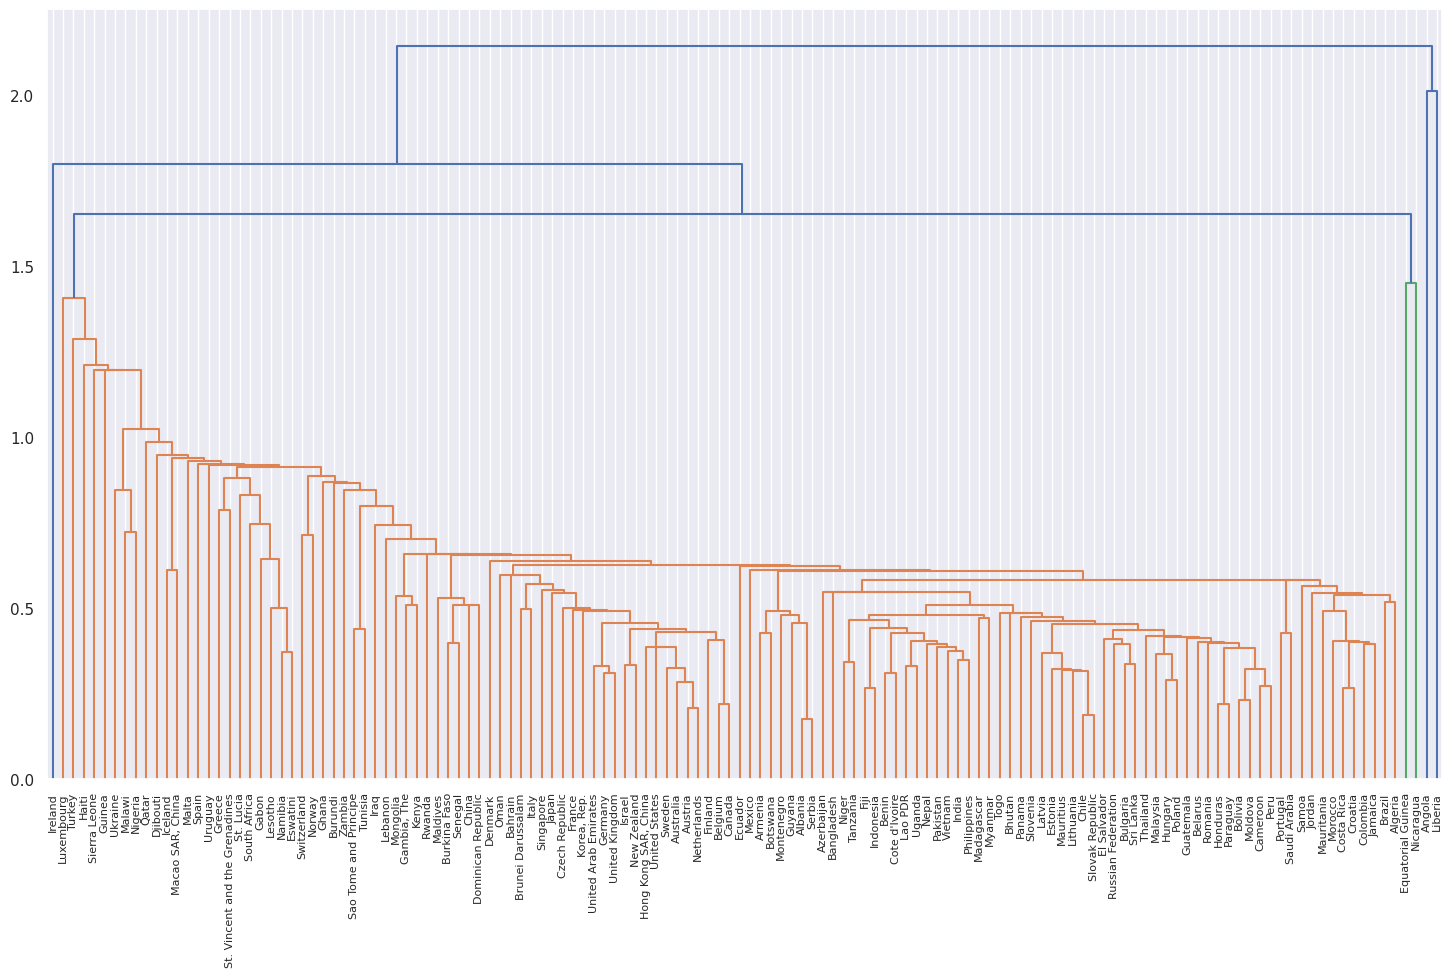

In [12]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.

df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'single')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

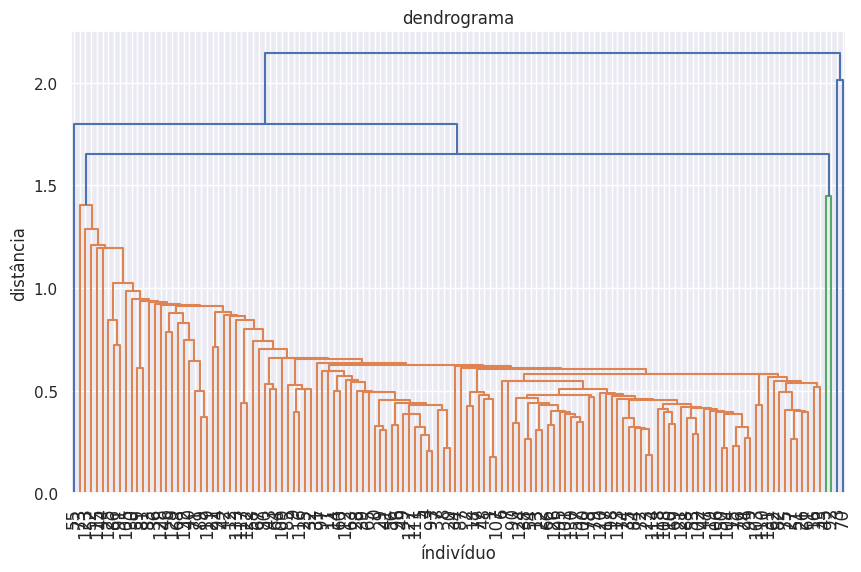

In [20]:
Z=linkage(df_scaled,method='single')

# distâncias

plt.figure(figsize=(10,6))
plt.title('dendrograma')
plt.xlabel('índivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90., #rotação do eixo
    leaf_font_size=12., #rotação da fonte
)
plt.show()

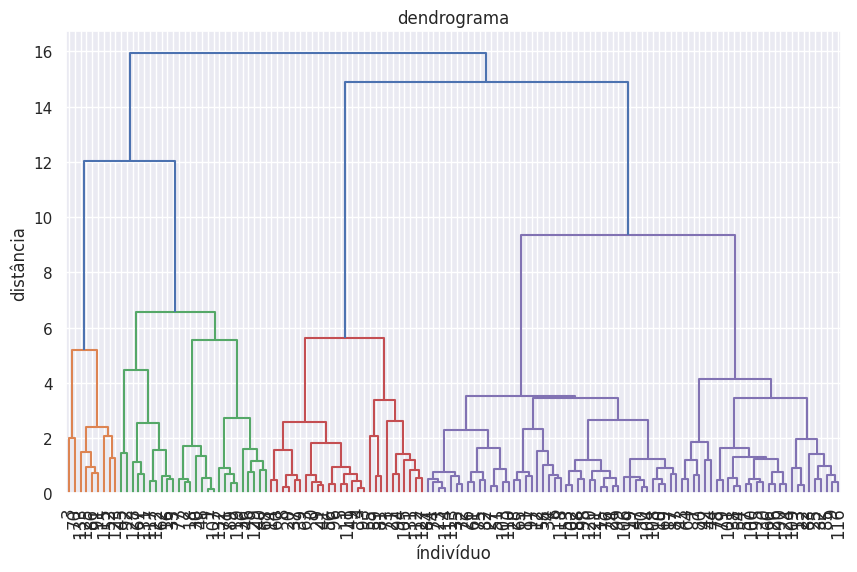

In [19]:
Z=linkage(df_scaled,method='ward')

# distâncias

plt.figure(figsize=(10,6))
plt.title('dendrograma')
plt.xlabel('índivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90., #rotação do eixo
    leaf_font_size=12., #rotação da fonte
)
plt.show()

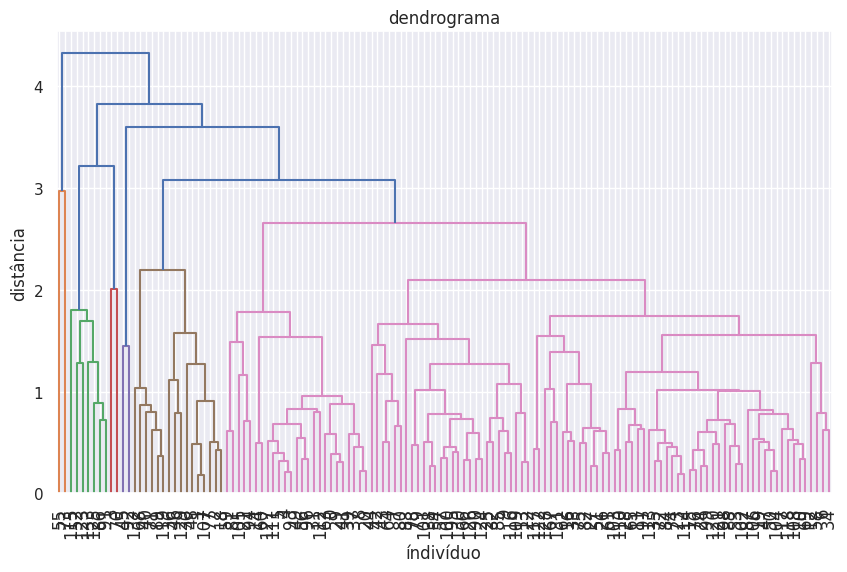

In [21]:
Z=linkage(df_scaled,method='average')

# distâncias

plt.figure(figsize=(10,6))
plt.title('dendrograma')
plt.xlabel('índivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90., #rotação do eixo
    leaf_font_size=12., #rotação da fonte
)
plt.show()

### resposta da b

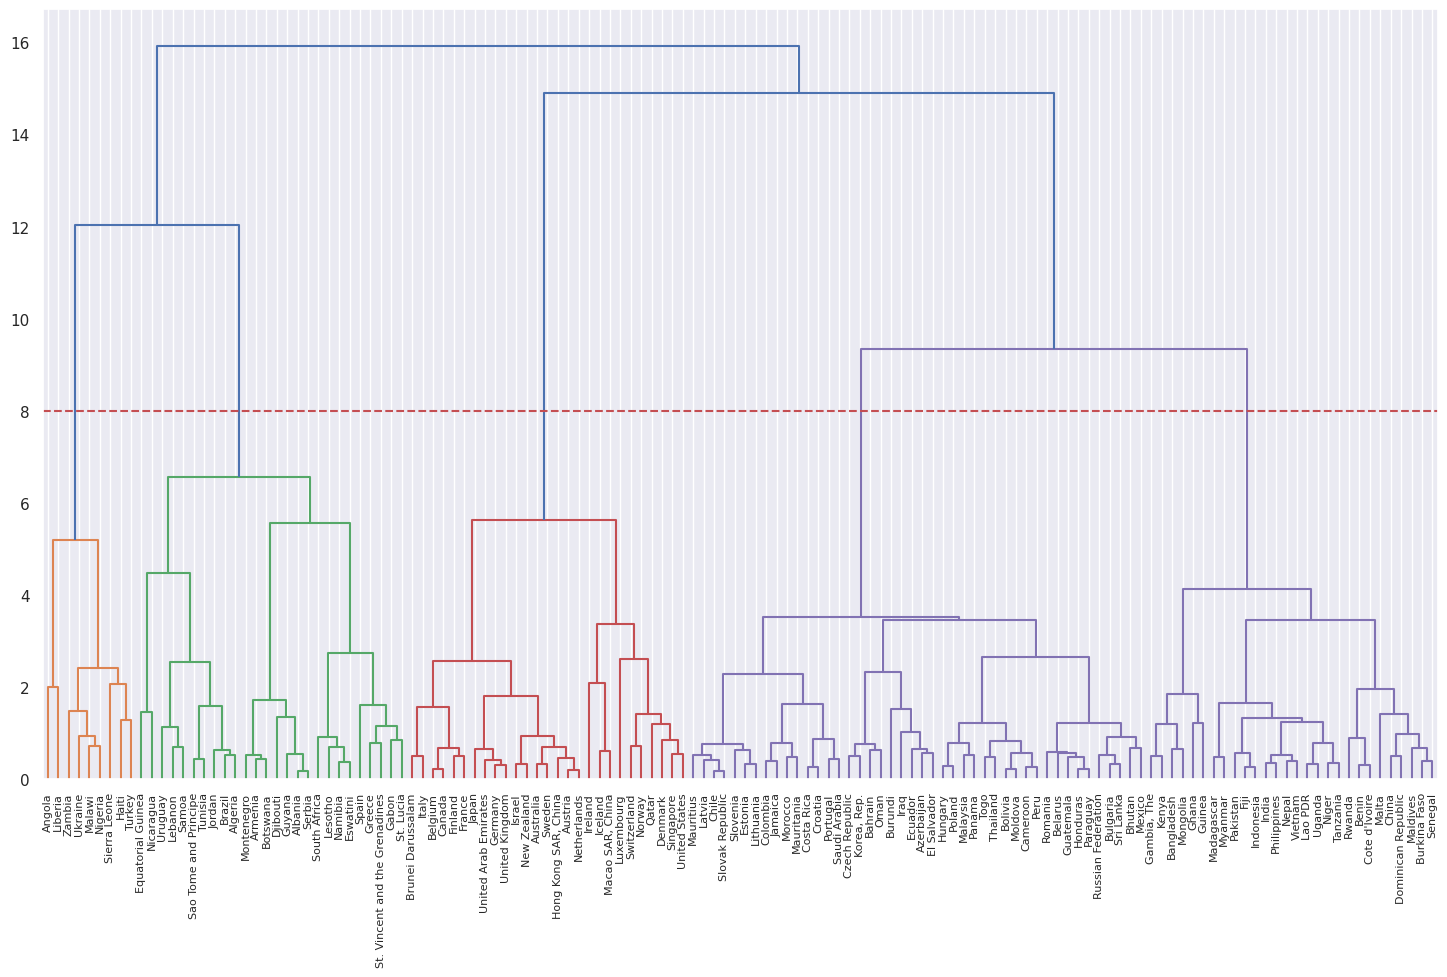

In [27]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'ward')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)
# Corte no dendrograma
plt.axhline(y=8, color='r', linestyle='--')
plt.show()


A altura 8 foi escolhida para o corte, pois permite identificar os grupos distino e bem definidos, assim facilitando a análise dos dados, além disso a altura proporciona um bom equilibrio entre detalhamento e simplicidade, com isso podemos dizer que o correto nessa leitura seria ter 5 clusters.

In [30]:
grupos=cut_tree(Z,height=8)

In [31]:
# incluir no dataframe de dados as informações sobre a qual grupo cada observação pertence
df_scaled['grupo']=grupos
df_scaled

,inflacao,pib_per_capita,crescimento_pib,desemprego,grupo
United Arab Emirates,-0.130461,1.122580,-0.893730,-0.797911,0
Albania,-0.407292,-0.545334,0.268457,1.317281,1
Armenia,-0.275282,-0.591352,0.806902,2.029755,1
Angola,4.395172,-0.625800,-2.495812,0.075963,2
Austria,-0.413215,1.498476,-0.305901,-0.384885,0
...,...,...,...,...,...
St. Vincent and the Grenadines,-0.327111,-0.451490,-0.383446,2.412518,1
Vietnam,-0.005894,-0.664174,1.651683,-0.925685,4
Samoa,0.168031,-0.583382,-1.208869,0.276217,1
South Africa,0.249206,-0.495834,-1.180513,3.756953,1


In [33]:
df_scaled.groupby('grupo').mean()

,inflacao,pib_per_capita,crescimento_pib,desemprego
grupo,,,,
0,-0.507025,1.751346,-0.446228,-0.376216
1,0.015938,-0.437959,-0.668663,1.575862
2,2.946656,-0.670127,-0.562434,0.092339
3,-0.354694,-0.285914,-0.097926,-0.353922
4,0.084355,-0.617429,1.385859,-0.574038


In [34]:
df_scaled.groupby('grupo').std()

,inflacao,pib_per_capita,crescimento_pib,desemprego
grupo,,,,
0,0.223435,0.843623,0.708180,0.431858
1,0.554182,0.282713,1.016200,1.062243
2,1.317982,0.124060,0.846955,0.653139
3,0.380675,0.356538,0.492570,0.450226
4,0.721847,0.257770,0.427113,0.455819


Apos esta analise podemos notar que o algoritmos foi bom porque os valora normalmente se encontrm proximo as medias e dentro dos desvio padroes

---



Questão 3

In [36]:
paises_interesse = ['Brazil',
                    'China',
                    'Uruguay',
                    'Paraguay',
                    'Chile',
                    'Peru',
                    'Bolivia',
                    'Ecuador',
                    'Colombia',
                    'Germany',
                    'United States',
                    'United Kingdom',
                    'Poland']

df_paises = df_scaled.loc[paises_interesse, :]
print(df_paises.shape)


(13, 5)


In [ ]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.

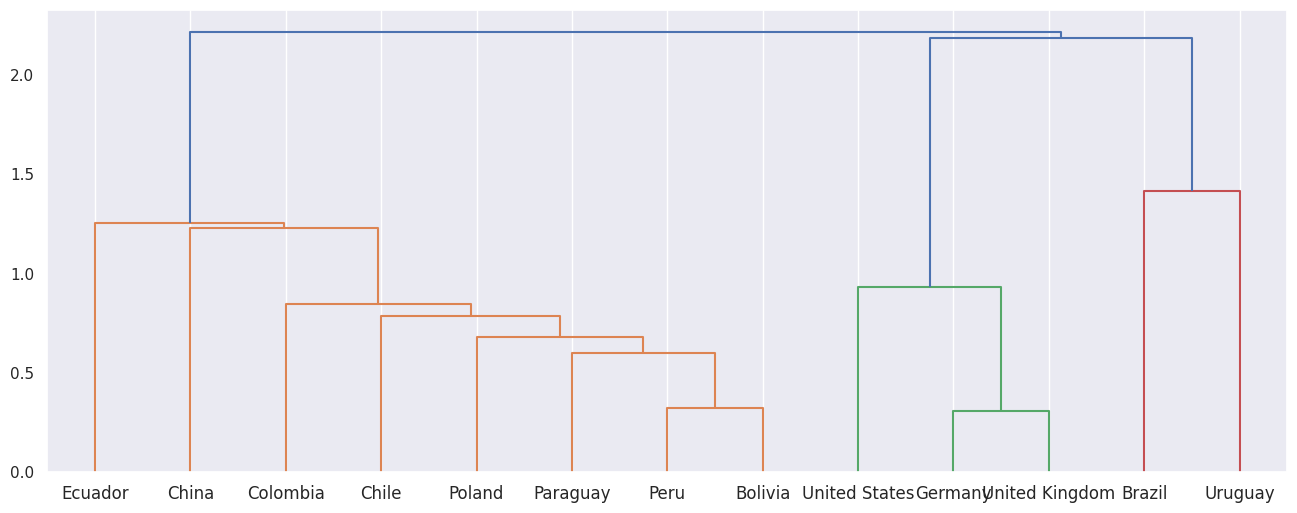

In [37]:
Z = hierarchy.linkage(df_paises, 'single')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

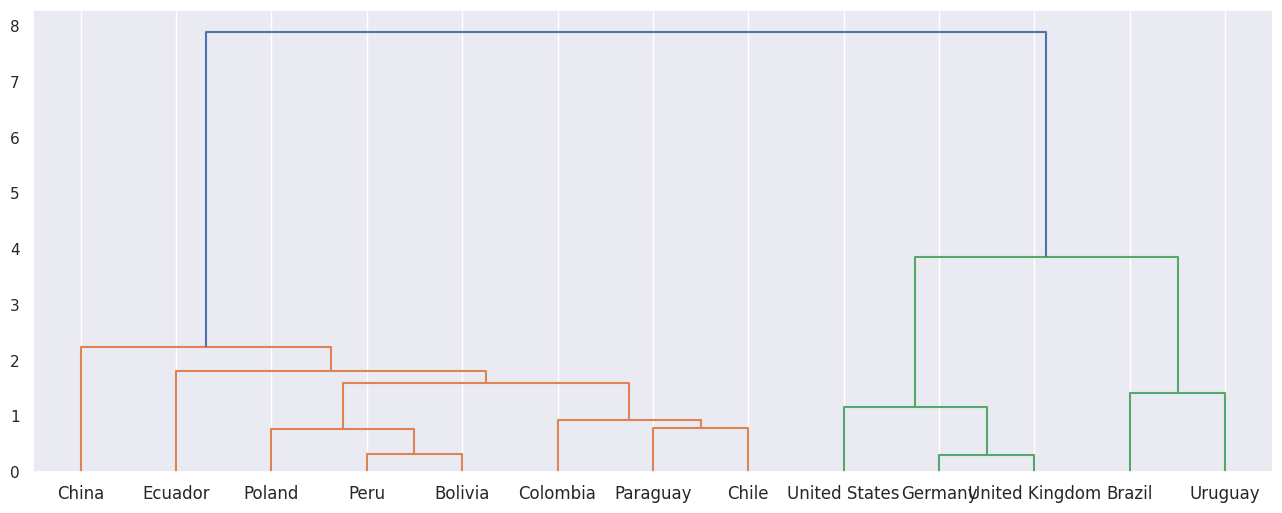

In [39]:
Z = hierarchy.linkage(df_paises, 'ward')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

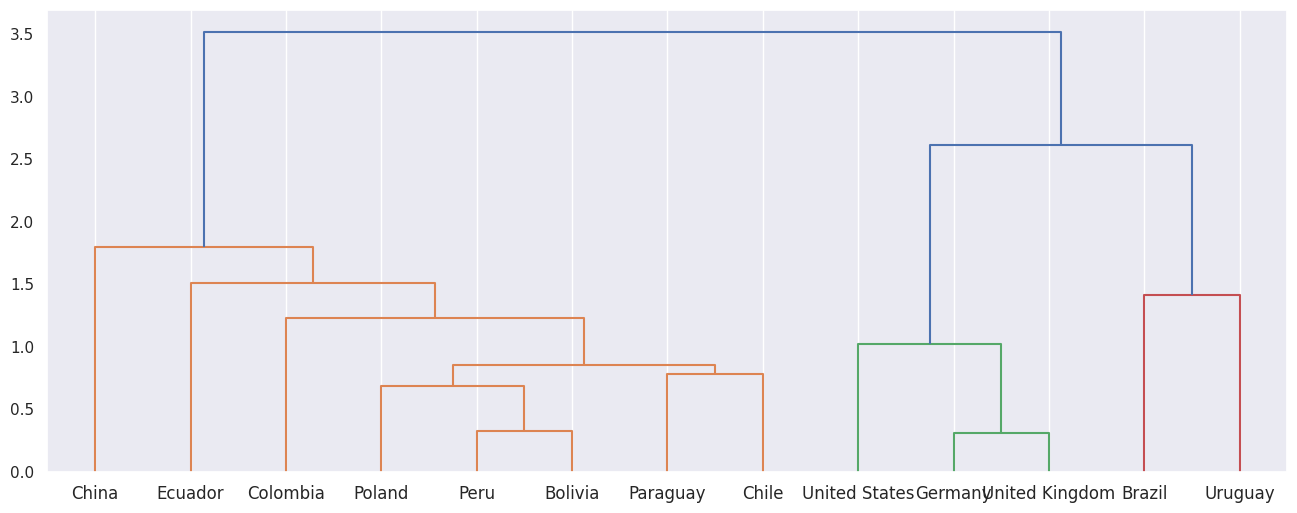

In [38]:
Z = hierarchy.linkage(df_paises, 'average')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

In [55]:
#Complete com a quantidade de grupos que você optou. E também com o método utilizado para agrupar.
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df_paises)

In [56]:
#Exibindo os elementos de cada grupo

countries = list(df_paises.index)
grouped_countries = {i: [] for i in range(n_clusters)}
for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['China', 'Paraguay', 'Chile', 'Peru', 'Bolivia', 'Ecuador', 'Colombia', 'Poland']

Cluster 1: ['Germany', 'United States', 'United Kingdom']

Cluster 2: ['Brazil', 'Uruguay']



In [44]:
# incluir no dataframe de dados as informações sobre a qual grupo cada observação pertence
df_paises['grupo']=groups
df_paises

,inflacao,pib_per_capita,crescimento_pib,desemprego,grupo
Brazil,0.027255,-0.383314,-1.031658,1.064347,1
China,-0.393019,-0.345756,1.437407,-0.453816,0
Uruguay,1.069095,-0.014079,-0.805350,0.208221,1
Paraguay,0.109393,-0.518037,0.103361,-0.398709,0
Chile,-0.297840,-0.073928,0.277573,0.070359,0
Peru,-0.593142,-0.470507,0.255887,-0.747660,0
Bolivia,-0.340878,-0.620666,0.367182,-0.670323,0
Ecuador,-1.000647,-0.497121,-0.914768,-0.548526,0
Colombia,-0.084976,-0.483583,-0.337859,0.419684,0
Germany,-0.483579,1.351911,-0.893071,-0.639126,2


from matplotlib import pyplot as plt
_df_0['inflacao'].plot(kind='hist', bins=20, title='inflacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pib_per_capita'].plot(kind='hist', bins=20, title='pib_per_capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['crescimento_pib'].plot(kind='hist', bins=20, title='crescimento_pib')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['desemprego'].plot(kind='hist', bins=20, title='desemprego')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='inflacao', y='pib_per_capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pib_per_capita', y='crescimento_pib', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='crescimento_pib', y='desemprego', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='desemprego', y='grupo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['inflacao'].plot(kind='line', figsize=(8, 4), title='inflacao')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pib_per_capita'].plot(kind='line', figsize=(8, 4), title='pib_per_capita')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['crescimento_pib'].plot(kind='line', figsize=(8, 4), title='crescimento_pib')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['desemprego'].plot(kind='line', figsize=(8, 4), title='desemprego')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Calcule a média, a mediana e o desvio padrão de cada grupo. Que informação interessante você observa em cada grupo.

In [45]:
df_paises.groupby('grupo').mean()

,inflacao,pib_per_capita,crescimento_pib,desemprego
grupo,,,,
0,-0.382917,-0.388198,0.246616,-0.365224
1,0.548175,-0.198697,-0.918504,0.636284
2,-0.371590,1.480645,-0.682304,-0.574554


Podemos observar que o grupo 0 possuí um crescimento de pib positivo, já o grupo 1 possuí crescimento de inflação positivo, grande crescimento de pib negativo, por fim o grupo 2 tem um grande índice de pib per capita

In [46]:
df_paises.groupby('grupo').median()

,inflacao,pib_per_capita,crescimento_pib,desemprego
grupo,,,,
0,-0.366949,-0.477045,0.266730,-0.501171
1,0.548175,-0.198697,-0.918504,0.636284
2,-0.335385,1.351911,-0.893071,-0.544229


conforme dito acima a mediana comprova nossa teoria acima


In [47]:
df_paises.groupby('grupo').std()

,inflacao,pib_per_capita,crescimento_pib,desemprego
grupo,,,,
0,0.332162,0.201633,0.700351,0.403470
1,0.736692,0.261089,0.160024,0.605373
2,0.098983,0.458871,0.375913,0.055956


o grupo 0 seu crescimento de pib difere bastante um do outro como desemprego, já no grupo 1 a inflação e o desemprego tem grandes diferenças de um para o outro, por fim no grupo 2 a inflação e o desemprego são parecidos.